# Analyzing Police Killing in US

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Read data
police_killings = pd. read_csv('police_killings.csv', encoding = 'ISO-8859-1')


In [2]:
police_killings.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')

In [3]:
#print(police_killings.dtypes)
print(police_killings['state_fp'].head(5))

0     1
1    22
2    55
3     6
4    39
Name: state_fp, dtype: int64


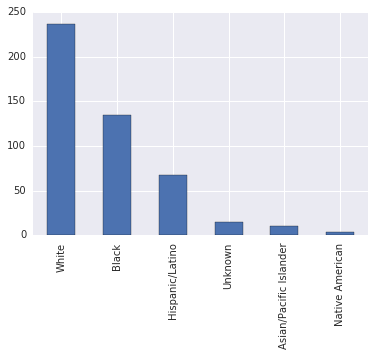

In [4]:
results = police_killings['raceethnicity'].value_counts()
results.plot(kind='bar')

Shootings By Race:

People identified as Hispanic appear to be killed about as often as 
random chance would account for (14% of the people killed as Hispanic, 
versus 17% of the overall population).
Whites are underrepresented among shooting victims vs their population 
percentage, as are Asians.

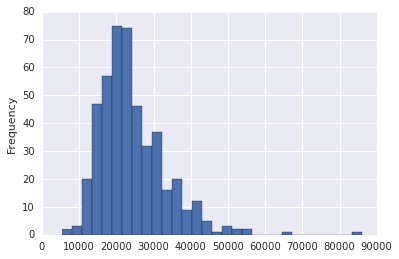

In [5]:
income = police_killings[police_killings['p_income']!= '-']
income = income['p_income']
#income.dropna(inplace=True)
income = income.astype(int)
income.plot(kind='hist',bins = 30)

Shootings By Regional Income:

According to the plot, most shooting tend to happen in areas where the 
income is around 22,000. 
The US personal median income according to census is around 28,000. Hence, we can say that the shootings tend to happed around less affluent areas.

In [6]:
state_pop = pd.read_csv('state_population.csv')
counts = police_killings['state_fp'].value_counts()

In [7]:
states =pd.DataFrame({"STATE": counts.index, "shootings": counts})
states = pd.merge(state_pop,states,on = 'STATE')
states['pop_millions'] = states['POPESTIMATE2015']/1000000 
states['rate'] = states['shootings']/states['pop_millions']
states.sort(columns='rate',ascending = False,inplace = True)
states

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,shootings,pop_millions,rate
35,40,3,7,40,Oklahoma,3911338,2950017,75.4,22,3.911338,5.624674
2,40,4,8,4,Arizona,6828065,5205215,76.2,25,6.828065,3.661359
27,40,2,4,31,Nebraska,1896190,1425853,75.2,6,1.896190,3.164240
11,40,4,9,15,Hawaii,1431603,1120770,78.3,4,1.431603,2.794071
1,40,4,9,2,Alaska,738432,552166,74.8,2,0.738432,2.708442
12,40,4,8,16,Idaho,1654930,1222093,73.8,4,1.654930,2.417021
31,40,4,8,35,New Mexico,2085109,1588201,76.2,5,2.085109,2.397956
18,40,3,7,22,Louisiana,4670724,3555911,76.1,11,4.670724,2.355095
5,40,4,8,8,Colorado,5456574,4199509,77.0,12,5.456574,2.199182
7,40,3,5,10,Delaware,945934,741548,78.4,2,0.945934,2.114312


In [8]:
pk = police_killings[police_killings['share_white']!= '-']
pk = pk[pk['share_black']!= '-']
pk = pk[pk['share_hispanic']!= '-']

In [12]:
pk[['share_white','share_black','share_hispanic']] = pk[['share_white','share_black','share_hispanic']].astype(float)

In [13]:
top = states['STATE'].head(10)
top = top.tolist()
bottom = states['STATE'].tail(10)
bottom = bottom.tolist()

In [14]:
top_10 = pk[pk['state_fp'].isin(top)]
bottom_10 = pk[pk['state_fp'].isin(bottom)]

In [21]:
top_10.head(3)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
5,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,...,79.0,15523,20833.0,53596,0.388704,1.0,1.0,58,0.073651,0.102955
21,Andre Murphy Sr,42,Male,Black,January,7,2015,1223 Omaha Ave,Norfolk,NE,...,2.9,23342,54809.0,46566,1.177018,4.0,3.0,10.3,0.035221,0.258886


In [22]:
top_10.describe()

/opt/dsserver/lib/python3.4/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,day,year,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,pop,share_white,share_black,share_hispanic,h_income,county_income,comp_income,county_bucket,nat_bucket,urate,college
count,92.000000,92.0,92.000000,92.000000,92.000000,92.000000,92.000000,9.200000e+01,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,84.000000,92.000000,92.000000,92.000000
mean,15.630435,2015.0,35.692503,-105.901915,19.619565,46.086957,237207.445652,1.966589e+10,19665.652174,4315.750000,55.652174,11.532609,20.693478,43327.152174,48706.967391,0.899455,2.476190,2.260870,0.102894,0.222367
std,9.030738,0.0,5.941451,15.627488,14.757261,42.203237,361762.631538,1.478322e+10,14783.200649,2063.723609,24.406158,19.591303,20.415690,17537.586163,9839.206872,0.334014,1.366344,1.175478,0.060407,0.141249
min,1.000000,2015.0,19.915194,-159.642700,2.000000,1.000000,100.000000,2.020001e+09,2020.000000,403.000000,2.100000,0.000000,0.000000,15293.000000,25498.000000,0.330230,1.000000,1.000000,0.011335,0.035051
25%,7.000000,2015.0,33.349889,-111.806766,4.000000,13.000000,2450.000000,4.021002e+09,4021.000000,2886.000000,39.175000,0.675000,4.350000,32509.250000,42987.000000,0.646527,NaN,1.000000,0.061153,0.120008
50%,16.000000,2015.0,35.268585,-104.943293,16.000000,27.000000,21803.500000,1.601401e+10,16014.000000,4257.500000,58.200000,2.700000,10.850000,39825.500000,48801.000000,0.856491,NaN,2.000000,0.089227,0.190484
75%,24.000000,2015.0,38.602924,-95.993210,35.000000,72.500000,379650.000000,3.503322e+10,35032.500000,5377.000000,74.200000,11.550000,31.725000,53574.750000,53596.000000,1.079215,NaN,3.000000,0.127920,0.271616
max,30.000000,2015.0,61.218408,-75.456352,40.000000,143.000000,978400.000000,4.014301e+10,40143.000000,13561.000000,95.900000,93.100000,81.500000,111464.000000,77454.000000,2.308703,5.000000,5.000000,0.324444,0.824971


In [24]:
bottom_10.describe()

/opt/dsserver/lib/python3.4/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,day,year,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,pop,share_white,share_black,share_hispanic,h_income,county_income,comp_income,county_bucket,nat_bucket,urate,college
count,55.000000,55.0,55.000000,55.000000,55.000000,55.000000,55.000000,5.500000e+01,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,53.000000,55.000000,55.000000,55.000000
mean,15.163636,2015.0,41.388989,-80.372303,32.781818,69.254545,241421.200000,3.285131e+10,32851.072727,4153.472727,60.132727,21.610909,12.994545,45410.436364,55037.963636,0.825253,2.301887,2.418182,0.127544,0.206110
std,8.526133,0.0,1.555304,7.024905,11.886330,56.704634,338096.836487,1.187539e+10,11875.547207,1395.466029,32.653614,27.898976,15.433434,21783.762734,12468.570173,0.313287,1.408558,1.300867,0.072674,0.148677
min,1.000000,2015.0,37.176040,-93.609646,9.000000,1.000000,101.000000,9.009184e+09,9009.000000,1271.000000,0.000000,0.000000,0.000000,18833.000000,34388.000000,0.329534,1.000000,1.000000,0.030341,0.026404
25%,7.500000,2015.0,40.610408,-87.859926,21.000000,26.000000,6465.000000,2.107848e+10,21078.000000,3236.500000,38.900000,2.150000,1.800000,31010.000000,46578.500000,0.610756,NaN,1.000000,0.083995,0.101664
50%,15.000000,2015.0,41.499610,-79.991463,36.000000,49.000000,40300.000000,3.605500e+10,36055.000000,4079.000000,72.100000,9.300000,5.900000,42346.000000,53119.000000,0.777663,NaN,2.000000,0.109368,0.160842
75%,22.000000,2015.0,42.287520,-73.950021,39.000000,108.000000,412150.000000,3.914627e+10,39146.000000,4923.500000,88.300000,27.450000,20.350000,58303.000000,59206.000000,1.041945,NaN,4.000000,0.166568,0.257514
max,31.000000,2015.0,46.159878,-68.100007,55.000000,201.000000,970300.000000,5.507902e+10,55079.000000,8222.000000,97.200000,98.900000,71.900000,142500.000000,87763.000000,1.677438,5.000000,5.000000,0.448075,0.744900


State by state rates:
    
By comparing the above two tables, It looks like the states with low rates of shootings tend to have a higher proportion of blacks in the population, and a lower proportion of hispanics in the census regions where the shootings occur. 
Also, the income is lower where the shooting is higher.